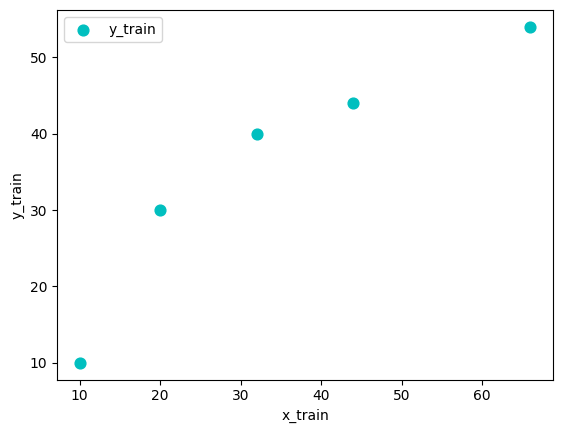

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x_train = np.array([10, 20, 32, 44, 66])
y_train = np.array([10, 30, 40, 44, 54])

plt.scatter(x_train, y_train, 60, marker='o', c='c', label='y_train')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()

In [11]:
def f_wb(x, w, b):
    """
    Linear regression model

    Parameters
    ----------
    x: (ndarray (m,)) or (scalar)
        m is the number of samples
    w: (scalar)
    b: (scalar)

    Returns
    -------
    (ndarray (m,)) or (scalar)
    """

    return w * x + b

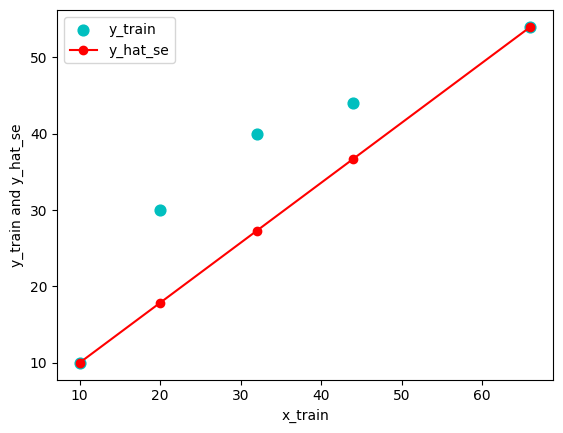

In [12]:
# simultaneous equations
w_se = 11 / 14  # 0.7857
b_se = 30 / 14  # 2.1428
y_hat_se = f_wb(x_train, w_se, b_se)
plt.scatter(x_train, y_train, 60, marker='o', c='c', label='y_train')
plt.plot(x_train, y_hat_se, 'ro-', label='y_hat_se')
plt.xlabel('x_train')
plt.ylabel('y_train and y_hat_se')
plt.legend()


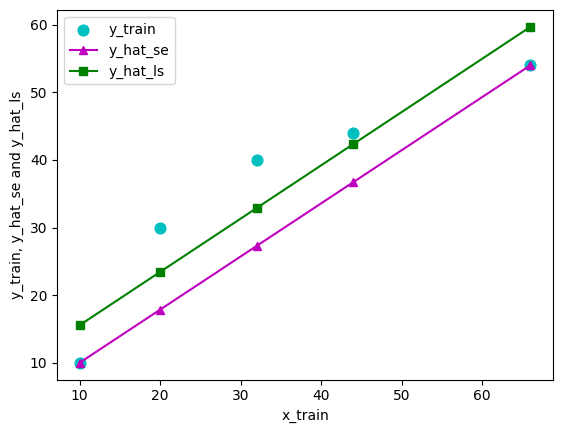

In [13]:
# least squares
w_ls = 0.788
b_ls = 7.674

y_hat_ls = f_wb(x_train, w_ls, b_ls)
plt.scatter(x_train, y_train, 60, marker='o', c='c', label='y_train')
plt.plot(x_train, y_hat_se, 'm^-', label='y_hat_se')
plt.plot(x_train, y_hat_ls, 'gs-', label='y_hat_ls')
plt.xlabel('x_train')
plt.ylabel('y_train, y_hat_se and y_hat_ls')
plt.legend()


In [14]:
# cost function
def compute_cost(x, y, w, b):
    """
    Compute cost

    Parameters
    ----------
    x: (ndarray (m,))
        m is the number of samples
    y: (ndarray (m,))
    w: (scalar)
    b: (scalar)

    Returns
    -------
    (scalar)
    """

    m = x.shape[0]
    y_hat = f_wb(x, w, b)
    cost = np.sum((y_hat - y) ** 2)
    return 1 / (2 * m) * cost

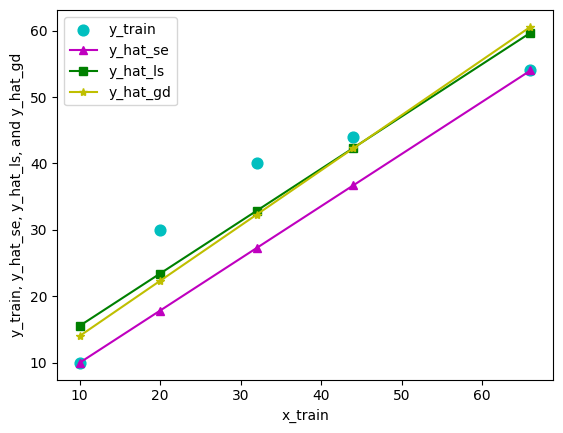

In [15]:
def compute_gradient(x, y, w, b):
    """
    Compute the gradient for linear regression

    Parameters
    ----------
    x: (ndarray (m,))
        m is the number of samples
    y: (ndarray (m,))
    w: (scalar)
    b: (scalar)

    Returns
    -------
    dj_dw: (scalar)
    dj_db: (scalar)
    """

    m = x.shape[0]
    dj_dw = 1 / m * np.sum((f_wb(x, w, b) - y) * x)
    dj_db = 1 / m * np.sum(f_wb(x, w, b) - y)
    return dj_dw, dj_db


def perform_gradient_descent(x, y, w_init, b_init, alpha, epochs):
    """
    Perform gradient descent

    Parameters
    ----------
    x: (ndarray (m,))
        m is the number of samples
    y: (ndarray (m,))
    w_init: (scalar)
    b_init: (scalar)
    alpha: (float)
    epochs: (int)

    Returns
    -------
    w: (scalar)
    b: (scalar)
    """

    w = w_init
    b = b_init
    for i in range(epochs):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b

w_dg, b_dg = perform_gradient_descent(x_train, y_train, 0, 0, 0.001, 3000)
y_hat_gd = f_wb(x_train, w_dg, b_dg)

plt.scatter(x_train, y_train, 60, marker='o', c='c', label='y_train')
plt.plot(x_train, y_hat_se, 'm^-', label='y_hat_se')
plt.plot(x_train, y_hat_ls, 'gs-', label='y_hat_ls')
plt.plot(x_train, y_hat_gd, 'y*-', label='y_hat_gd')
plt.xlabel('x_train')
plt.ylabel('y_train, y_hat_se, y_hat_ls, and y_hat_gd')
plt.legend()

In [16]:
(w_se, b_se), (w_ls, b_ls), (w_dg, b_dg)

((0.7857142857142857, 2.142857142857143),
 (0.788, 7.674),
 (np.float64(0.8312661524754889), np.float64(5.714916639215474)))

In [17]:
(y_train, y_hat_se, y_hat_ls, y_hat_gd)

(array([10, 30, 40, 44, 54]),
 array([10.        , 17.85714286, 27.28571429, 36.71428571, 54.        ]),
 array([15.554, 23.434, 32.89 , 42.346, 59.682]),
 array([14.02757816, 22.34023969, 32.31543352, 42.29062735, 60.5784827 ]))

In [18]:
cost_se = compute_cost(x_train, y_train, w_se, b_se)
cost_ls = compute_cost(x_train, y_train, w_ls, b_ls)
cost_gd = compute_cost(x_train, y_train, w_dg, b_dg)
(cost_se, cost_ls, cost_gd)


(np.float64(36.21836734693877),
 np.float64(15.953221200000002),
 np.float64(18.014426543403744))